In [5]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense, Embedding, MaxPooling1D, Conv1D, Dropout, SpatialDropout1D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


In [49]:
data = pandas.read_csv("demographic.csv")
data = data.abs()
print(len(data))
data.fillna(0, inplace=True)
print(data.dtypes)
data = data.astype(int)
print(data.dtypes)
v = data.iloc[112]
# print(v)
f = v[5]
# print(f)
# print(data.head)
# plt.plot(data)
# plt.show()

10175
SEQN          int64
SDDSRVYR      int64
RIDSTATR      int64
RIAGENDR      int64
RIDAGEYR      int64
RIDAGEMN    float64
RIDRETH1      int64
RIDRETH3      int64
RIDEXMON    float64
RIDEXAGM    float64
DMQMILIZ    float64
DMQADFC     float64
DMDBORN4      int64
DMDCITZN    float64
DMDYRSUS    float64
DMDEDUC3    float64
DMDEDUC2    float64
DMDMARTL    float64
RIDEXPRG    float64
SIALANG       int64
SIAPROXY    float64
SIAINTRP      int64
FIALANG     float64
FIAPROXY    float64
FIAINTRP    float64
MIALANG     float64
MIAPROXY    float64
MIAINTRP    float64
AIALANGA    float64
DMDHHSIZ      int64
DMDFMSIZ      int64
DMDHHSZA      int64
DMDHHSZB      int64
DMDHHSZE      int64
DMDHRGND      int64
DMDHRAGE      int64
DMDHRBR4    float64
DMDHREDU    float64
DMDHRMAR    float64
DMDHSEDU    float64
WTINT2YR    float64
WTMEC2YR    float64
SDMVPSU       int64
SDMVSTRA      int64
INDHHIN2    float64
INDFMIN2    float64
INDFMPIR    float64
dtype: object
SEQN        int64
SDDSRVYR    int64
RIDS

In [41]:
min_value = 0  # Minimum allowed value
max_value = 1000000  # Maximum allowed value

# Iterate over the dataset and check for out-of-range values
out_of_range_count = 0

for column in data.columns:
    for value in data[column]:
        if value < min_value or value > max_value:
            out_of_range_count += 1
            # You can print or process the out-of-range value as needed
            print("Out of range value:", value)

# Print the count of out-of-range values
print("Number of out-of-range values:", out_of_range_count)

Number of out-of-range values: 0


In [50]:
X=data
y=data
X.shape, y.shape
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=8) 

In [51]:
d = len(X_train)+len(X_test)
print(X.shape, len(X_train),len(y_train),"xtest",len(X_test),"ytest:",len(y_test),"sum:",d)

(10175, 47) 8648 8648 xtest 1527 ytest: 1527 sum: 10175


In [56]:
print(X_train)
model  = Sequential()
model.add(Embedding(1000000,128,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.6))
model.add(LSTM(200, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(47,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
8495  82052         8         2         2        60         0         3   
8706  82263         8         2         2         9         0         4   
1833  75390         8         2         1        36         0         5   
1158  74715         8         2         1        11         0         4   
3699  77256         8         2         1        30         0         3   
...     ...       ...       ...       ...       ...       ...       ...   
6995  80552         8         2         2        41         0         3   
2181  75738         8         2         1        47         0         2   
2033  75590         8         2         1        45         0         5   
9556  83113         8         2         2         8         0         3   
4547  78104         8         2         1        61         0         1   

      RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHREDU  DMDHRMAR  DMDHSEDU  \
8495         3         2  

In [57]:
batch_size = 128
checkPoint = ModelCheckpoint('model_checkpoint.h5',
                             monitor='loss',
                             verbose=1,
                             save_best_only=True, mode='min')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size = batch_size)

y_pred = model.predict(X_test)

Epoch 1/20
68/68 [==============================] - 123s 2s/step - loss: -37616.1758 - accuracy: 0.8822 - val_loss: -63758.4453 - val_accuracy: 0.9168
Epoch 2/20
68/68 [==============================] - 119s 2s/step - loss: -86201.7344 - accuracy: 0.9084 - val_loss: -105883.4844 - val_accuracy: 0.9168
Epoch 3/20
68/68 [==============================] - 119s 2s/step - loss: -128489.2969 - accuracy: 0.9084 - val_loss: -146701.0000 - val_accuracy: 0.9168
Epoch 4/20
68/68 [==============================] - 118s 2s/step - loss: -169801.2500 - accuracy: 0.9084 - val_loss: -186779.9531 - val_accuracy: 0.9168
Epoch 5/20
68/68 [==============================] - 118s 2s/step - loss: -210581.7031 - accuracy: 0.9084 - val_loss: -226548.6406 - val_accuracy: 0.9168
Epoch 6/20
68/68 [==============================] - 131s 2s/step - loss: -251302.2812 - accuracy: 0.9084 - val_loss: -266627.1250 - val_accuracy: 0.9168
Epoch 7/20
68/68 [==============================] - 118s 2s/step - loss: -292174.8750

In [58]:
def transform_predict(message: list):
    return pad_sequences(tokenizer.texts_to_sequences(message), maxlen=28, dtype='int32', value=0) 
  
def predict(X):
    X = transform_predict(X)
    return model.predict(X)[0]

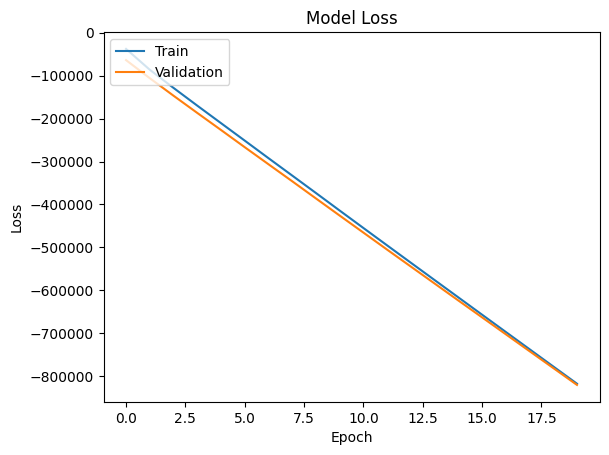

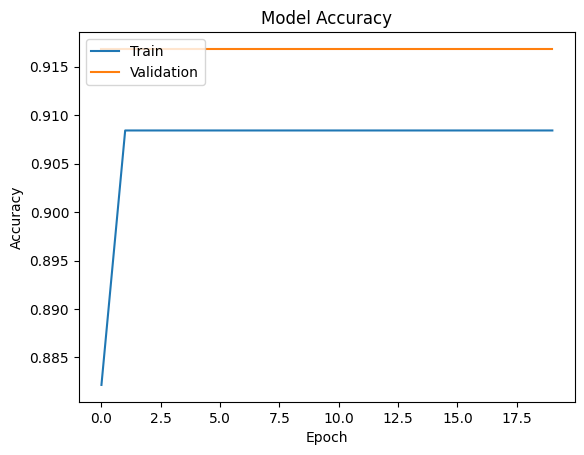

In [59]:
def plot_learning_curve(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the learning curve
plot_learning_curve(history)